In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/ola_driver_scaler.csv')

In [2]:
data.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [3]:
data.drop(columns = data.columns[0],inplace= True)

In [4]:
data.shape

(19104, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [6]:
data.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [7]:
data.isnull().sum()

,0
MMM-YY,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488
Joining Designation,0


In [8]:
data.rename(columns = {'MMM-YY' : 'ReportDate'},inplace = True)

In [9]:
categorical_cols = ['Gender', 'City', 'Education_Level', 'Joining Designation', 'Grade']
for i in categorical_cols:
    data[i] = data[i].astype('category')

In [10]:
data['Dateofjoining'] = pd.to_datetime(data['Dateofjoining'])
data['LastWorkingDate'] = pd.to_datetime(data['LastWorkingDate'])

<ipython-input-10-021d6ca1f0b1>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dateofjoining'] = pd.to_datetime(data['Dateofjoining'])
<ipython-input-10-021d6ca1f0b1>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['LastWorkingDate'] = pd.to_datetime(data['LastWorkingDate'])


In [11]:
data['Months Since Last Work'] = (pd.to_datetime('today') - data['LastWorkingDate']).dt.days // 30
data['Churn'] = (data['Months Since Last Work'] > 3).astype(int)

In [12]:
continuous_cols = ['Age','Income','Total Business Value','Quarterly Rating']

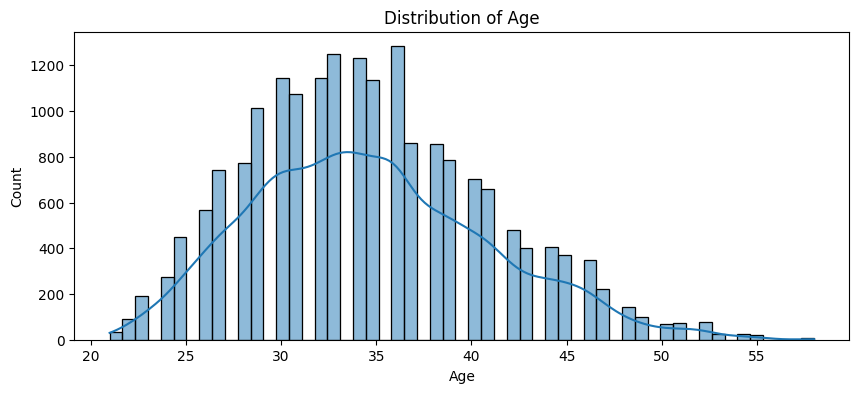

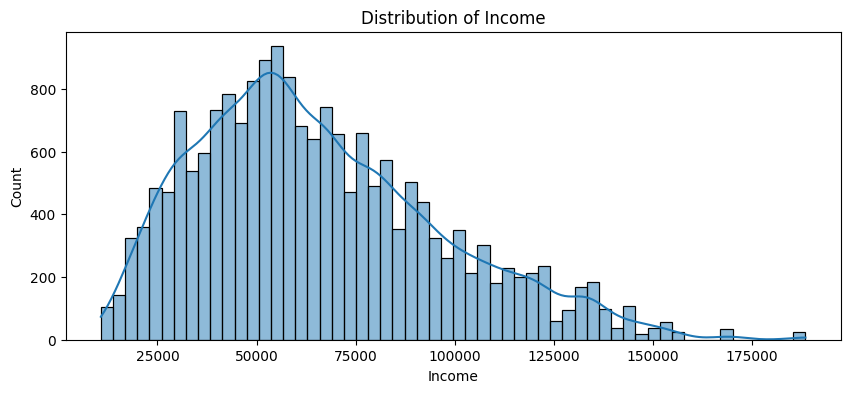

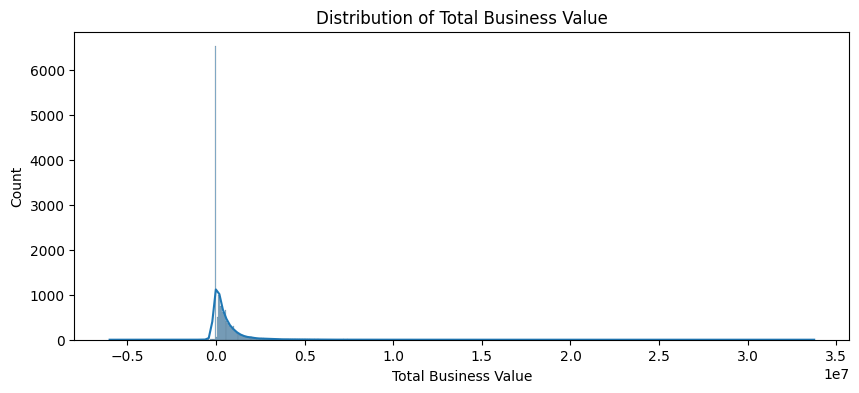

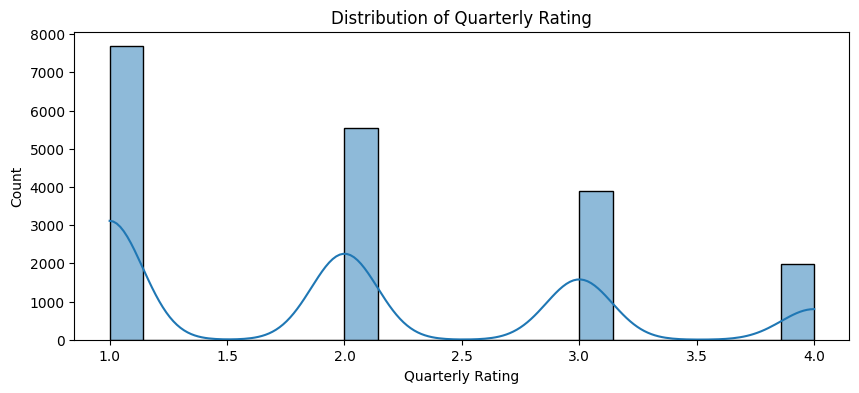

In [13]:
for i in continuous_cols:
  plt.figure(figsize=(10,4))
  sns.histplot(data[i],kde=True)
  plt.title(f"Distribution of {i}")
  plt.show()

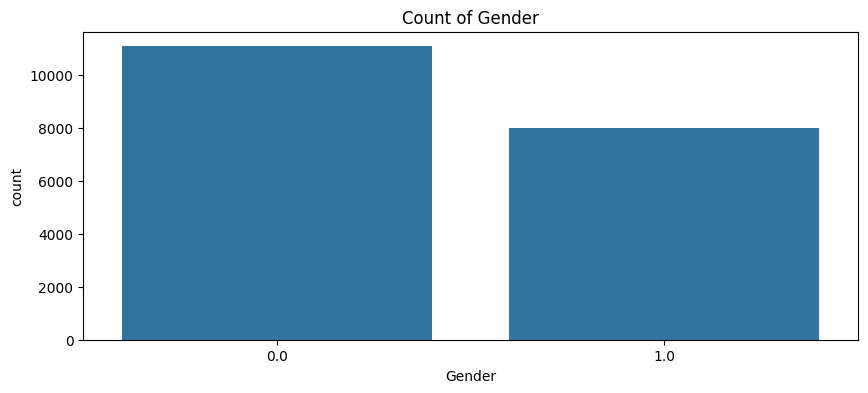

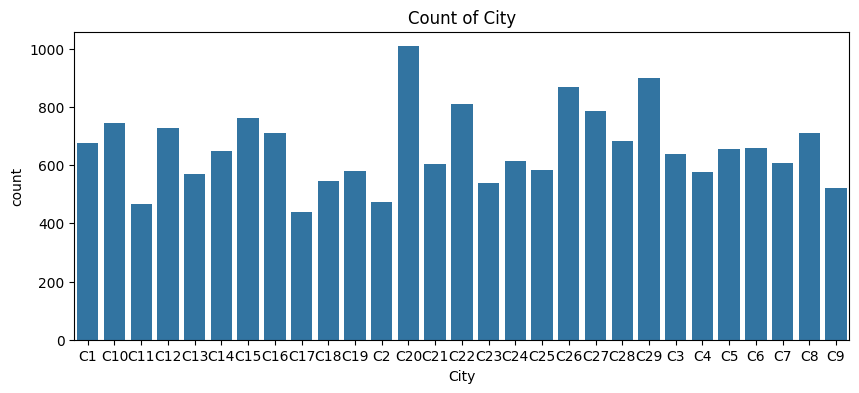

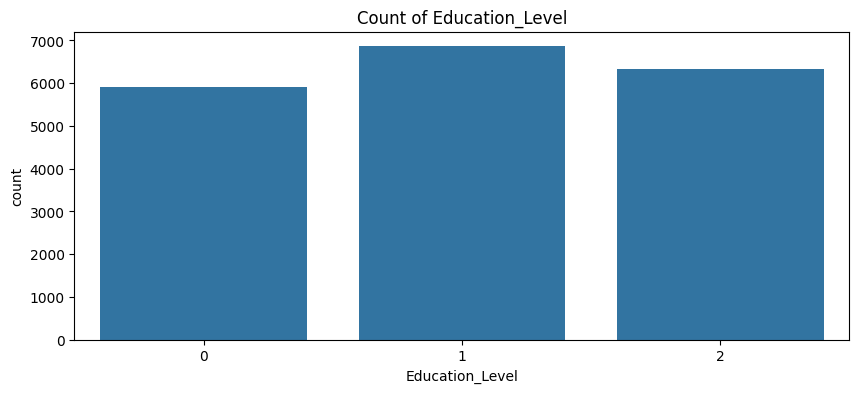

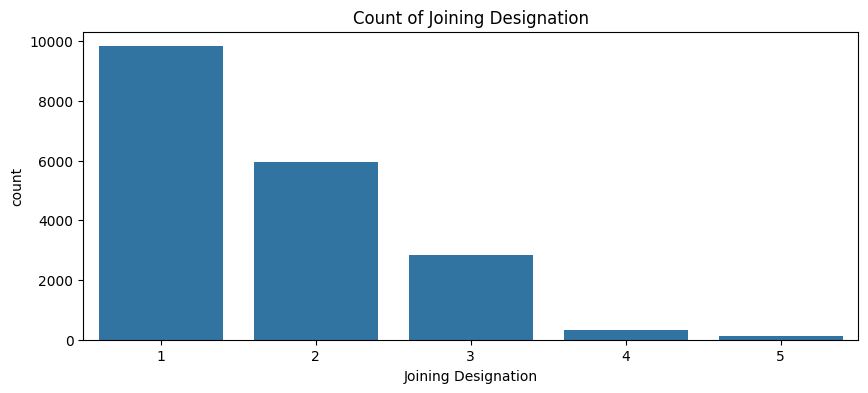

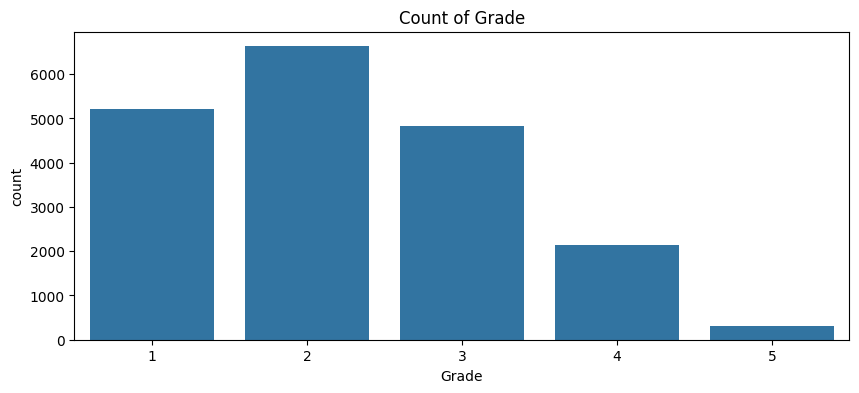

In [14]:
for i in categorical_cols:
  plt.figure(figsize = (10,4))
  sns.countplot(x=data[i])
  plt.title(f"Count of {i}")
  plt.show()

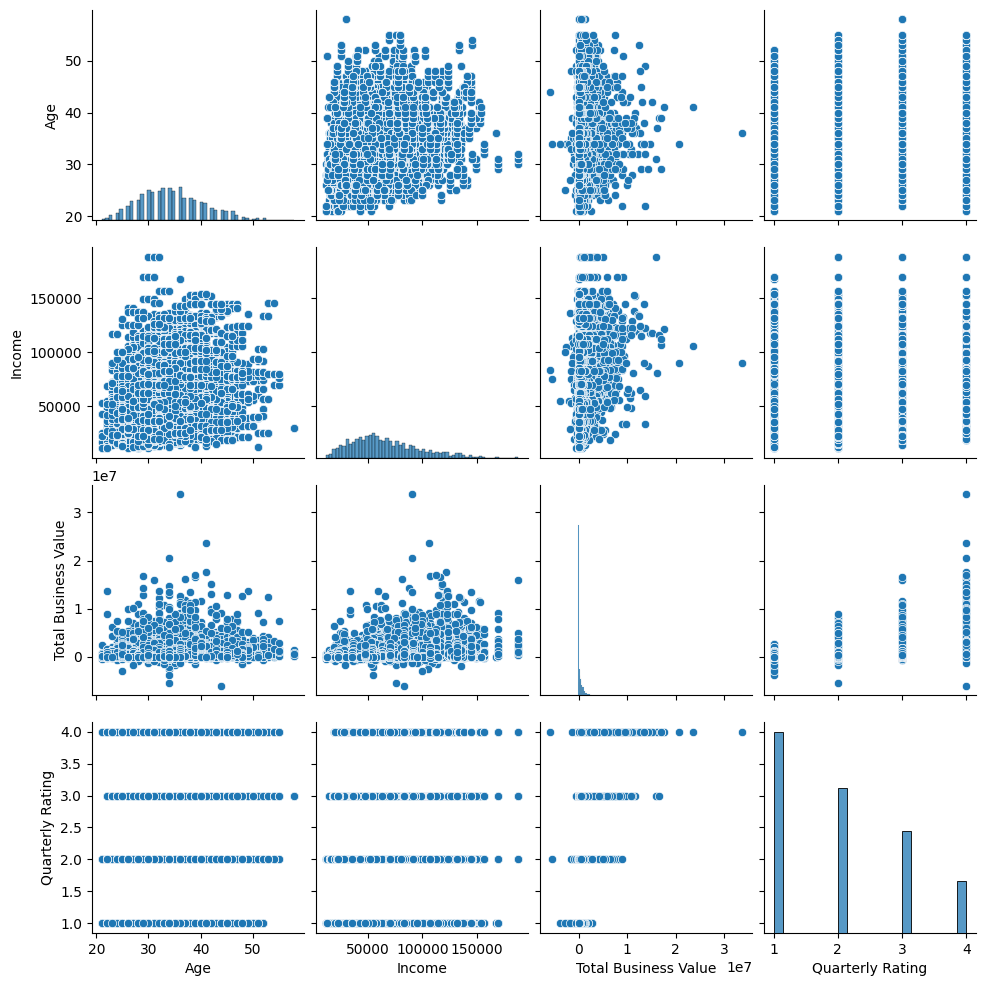

In [15]:
sns.pairplot(data[continuous_cols])
plt.show()

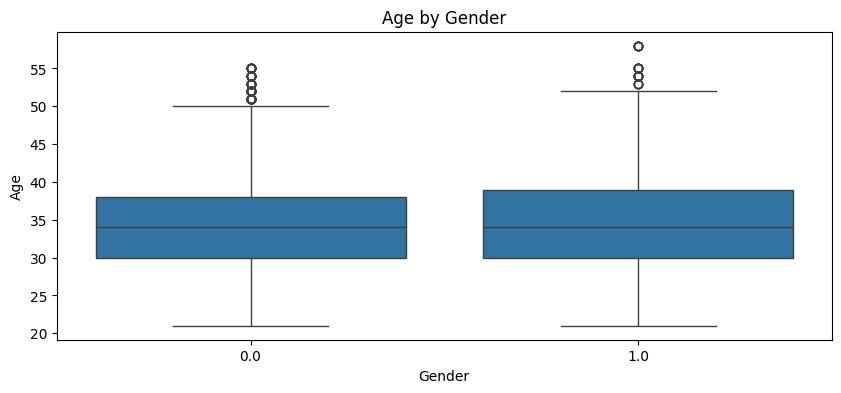

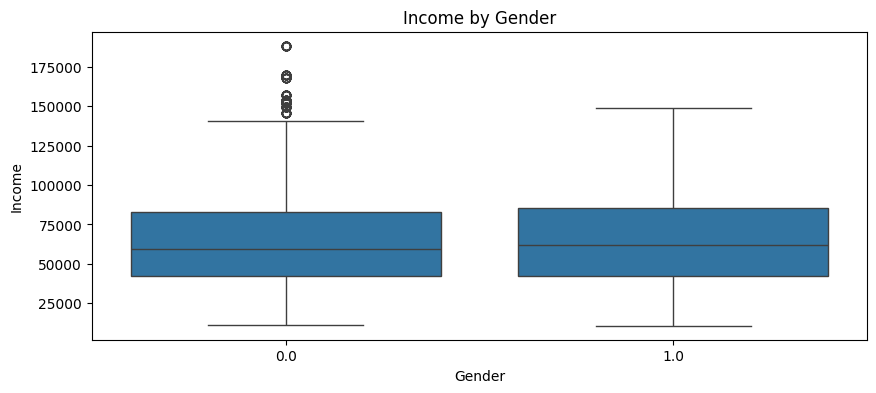

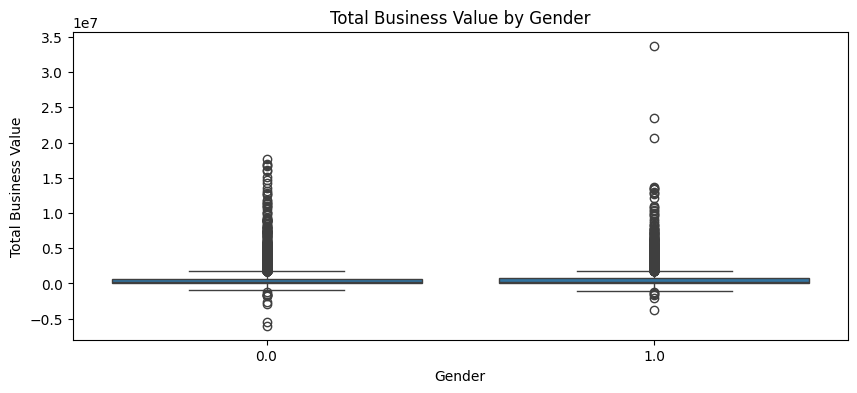

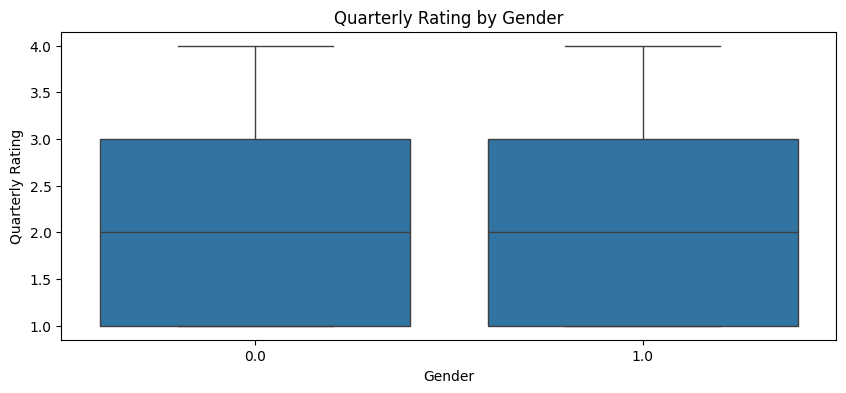

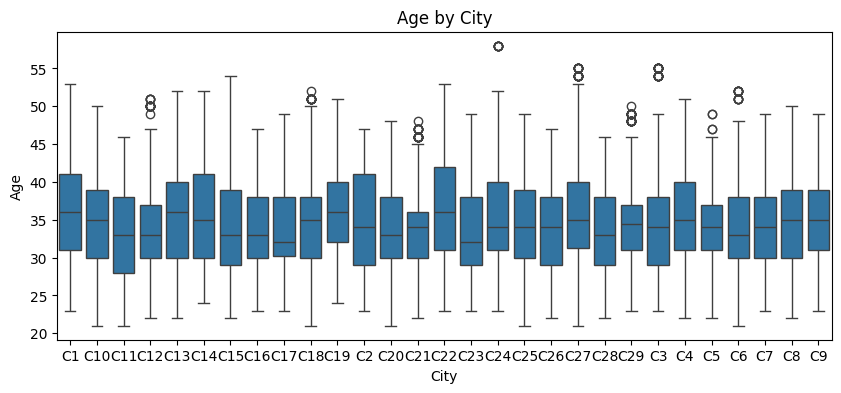

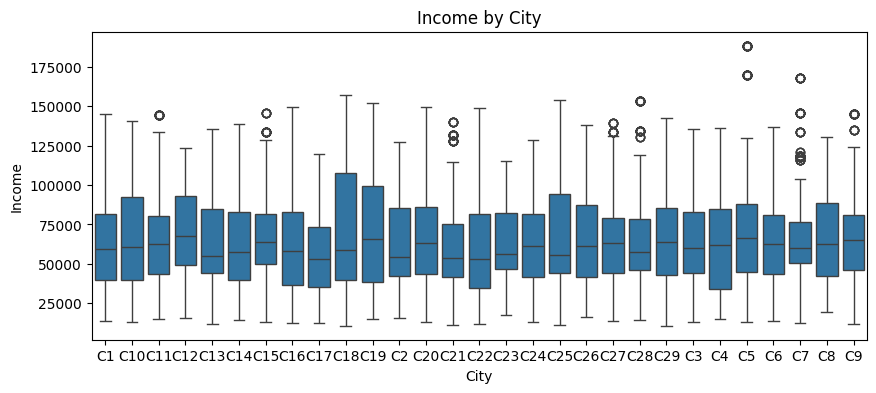

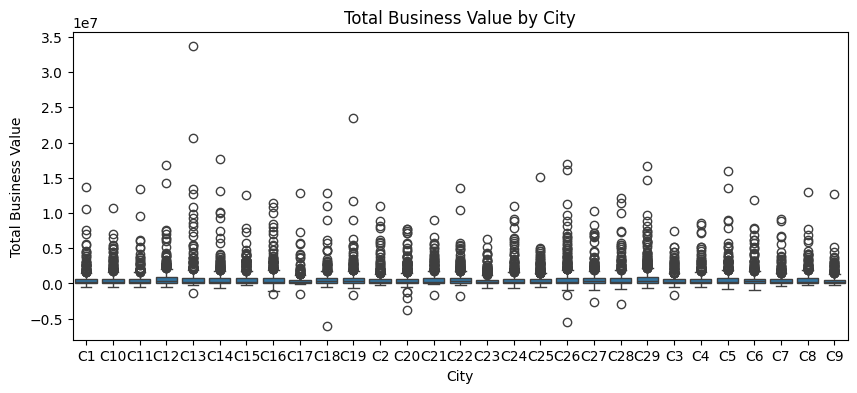

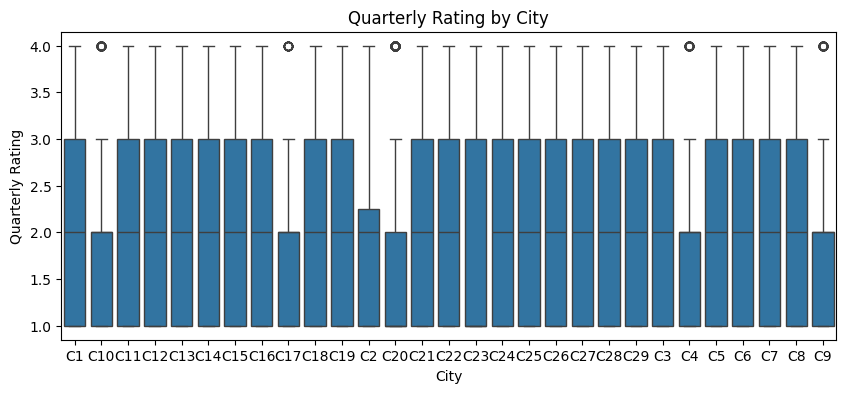

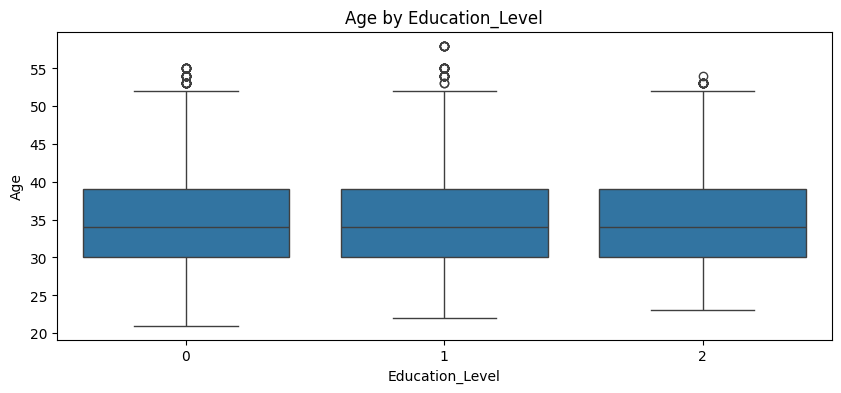

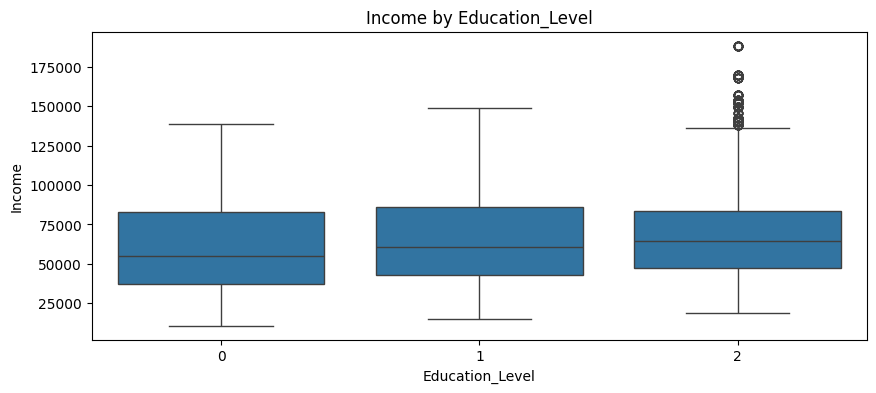

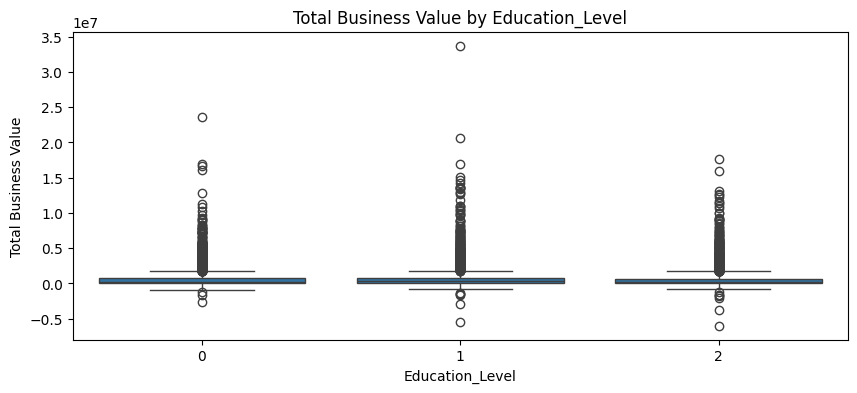

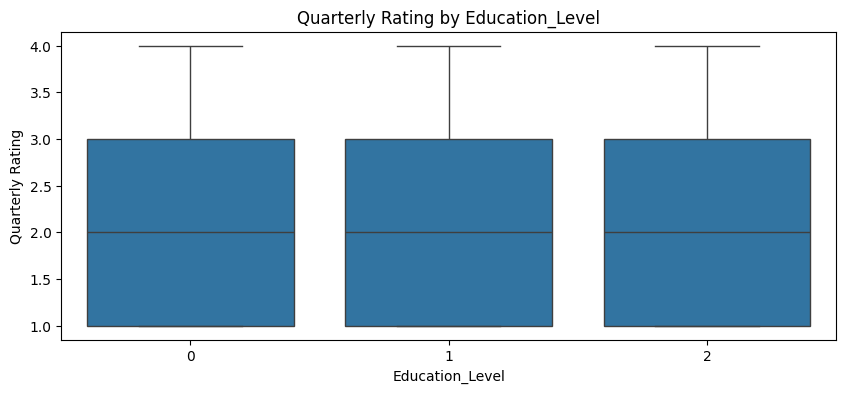

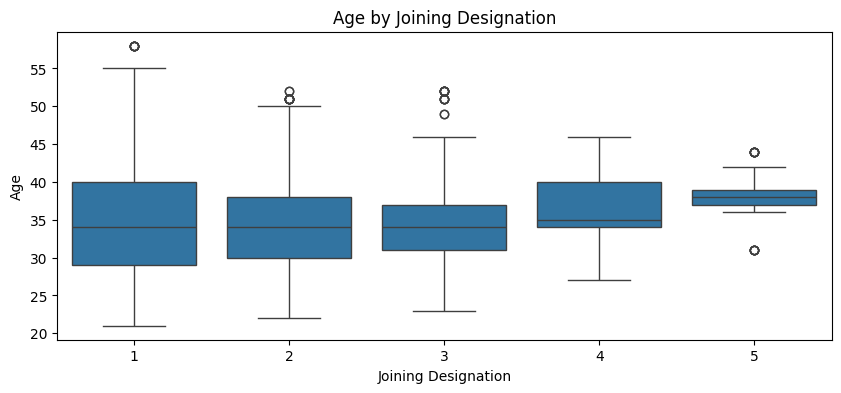

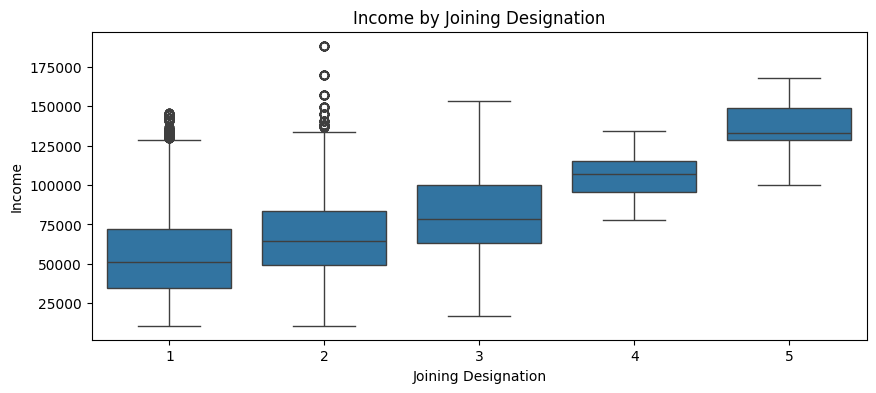

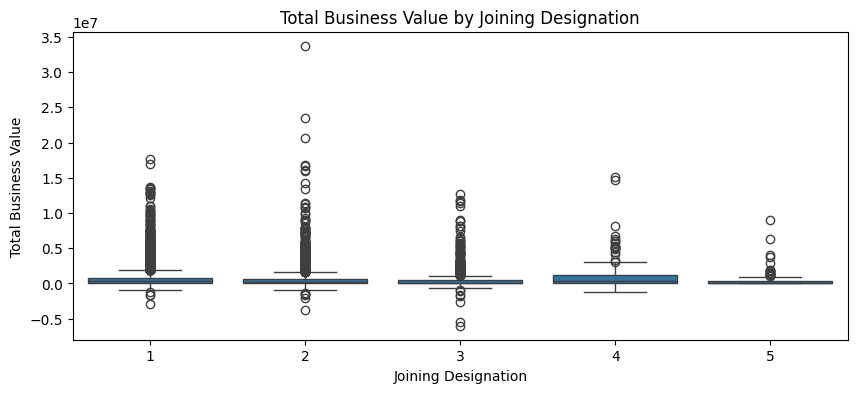

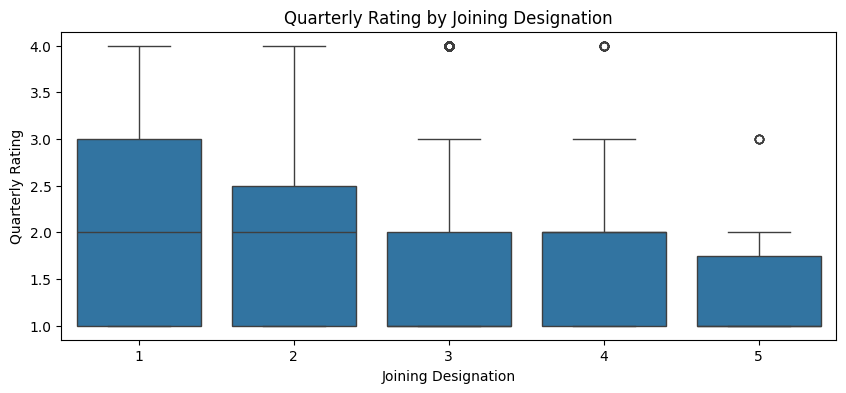

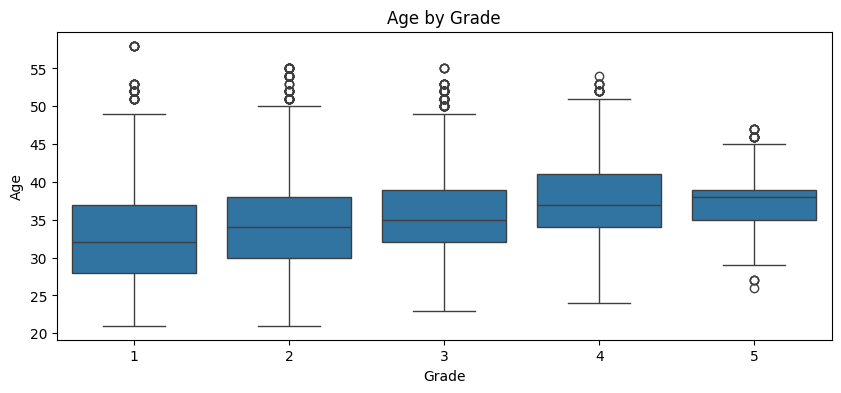

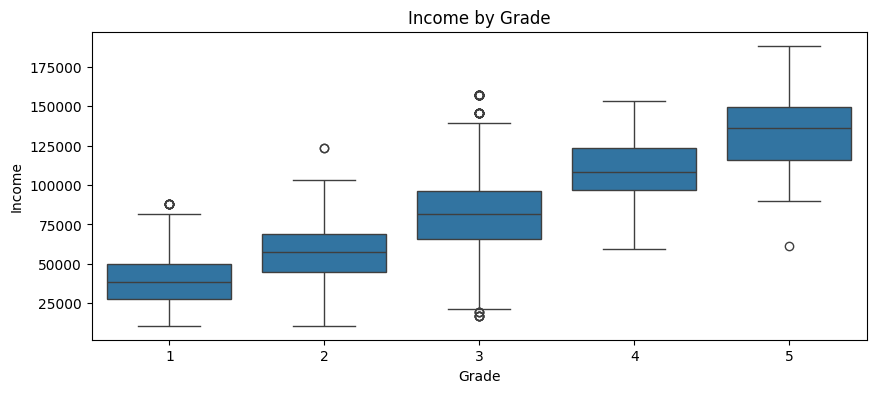

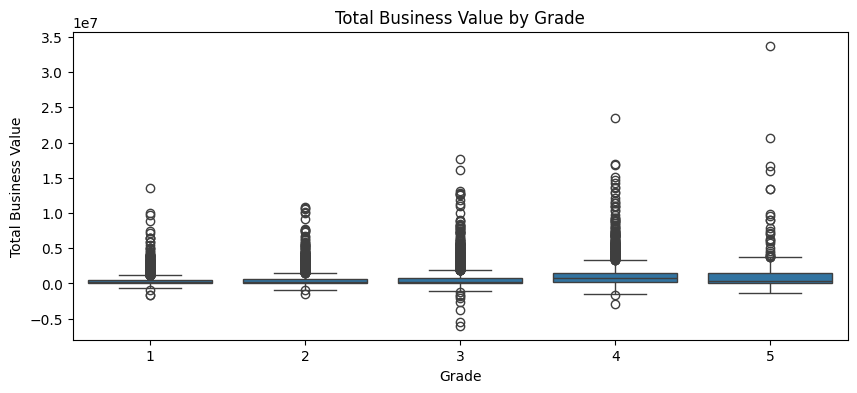

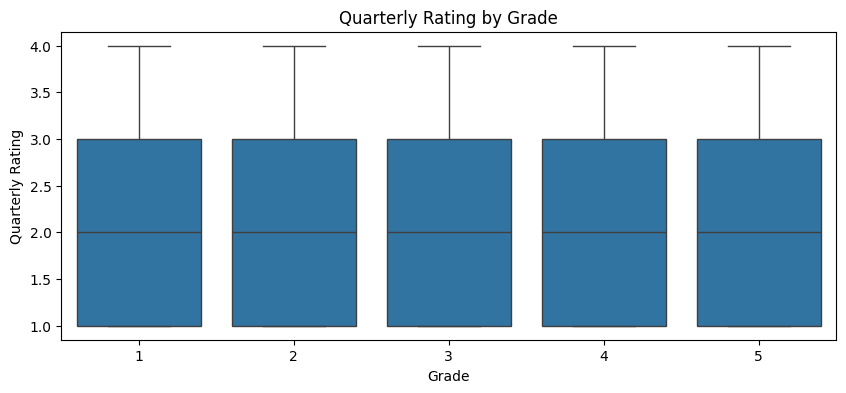

In [16]:
for i in categorical_cols:
  for j in continuous_cols:
    plt.figure(figsize=(10,4))
    sns.boxplot(x = data[i], y = data[j])
    plt.title(f'{j} by {i}')
    plt.show()

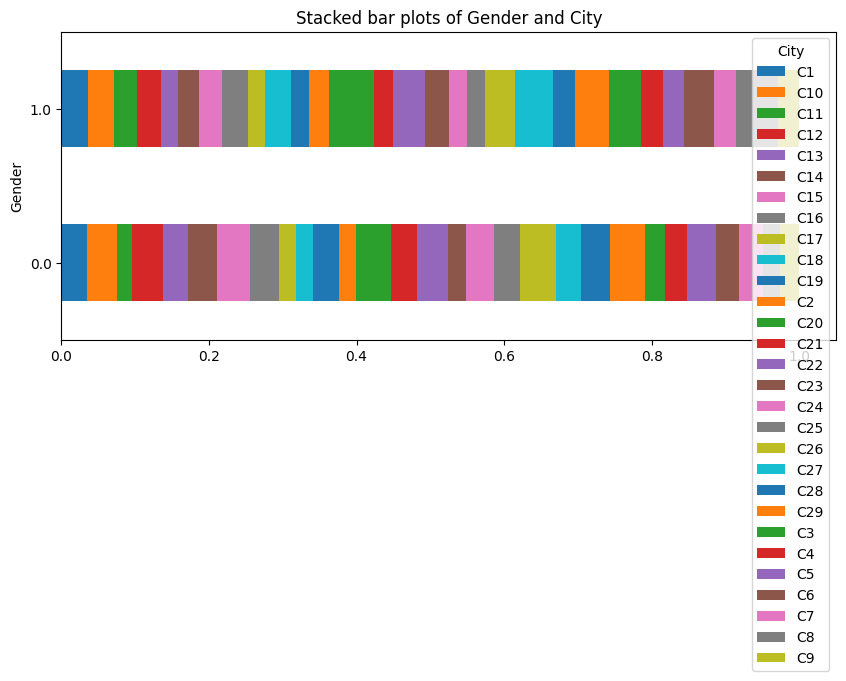

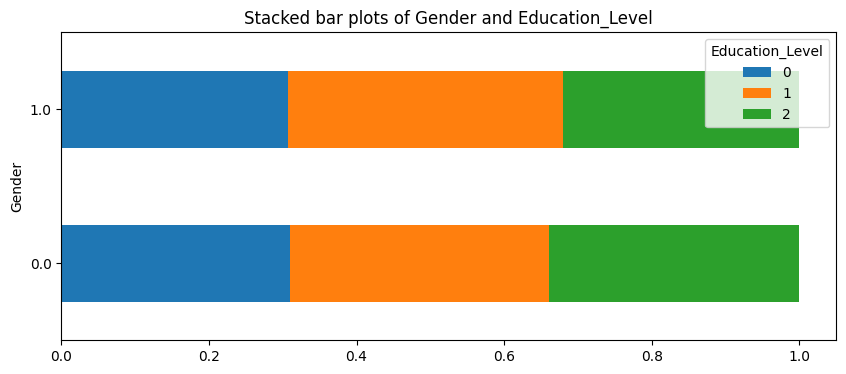

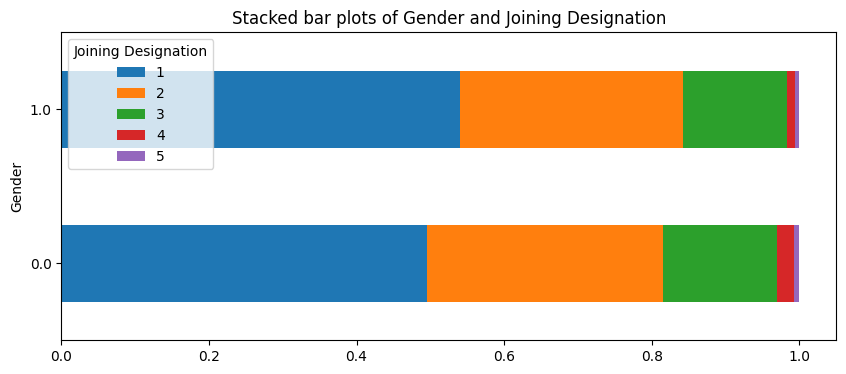

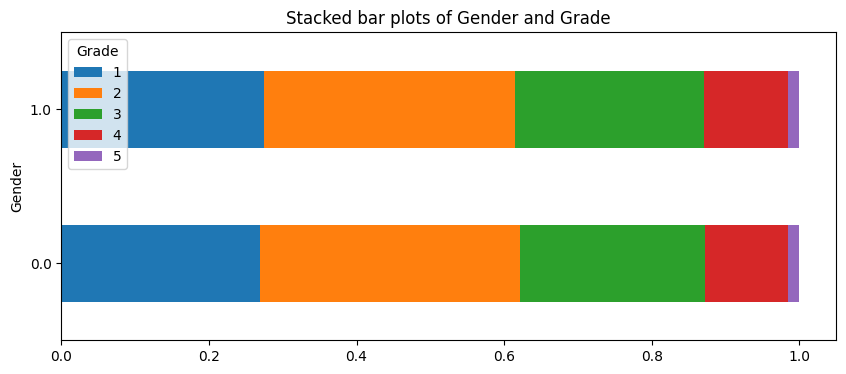

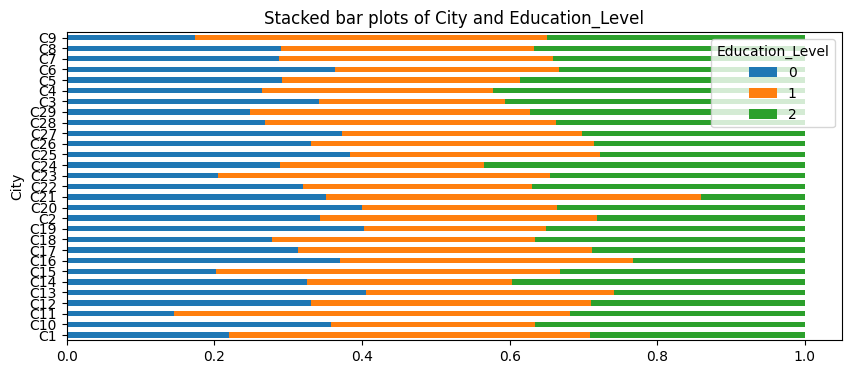

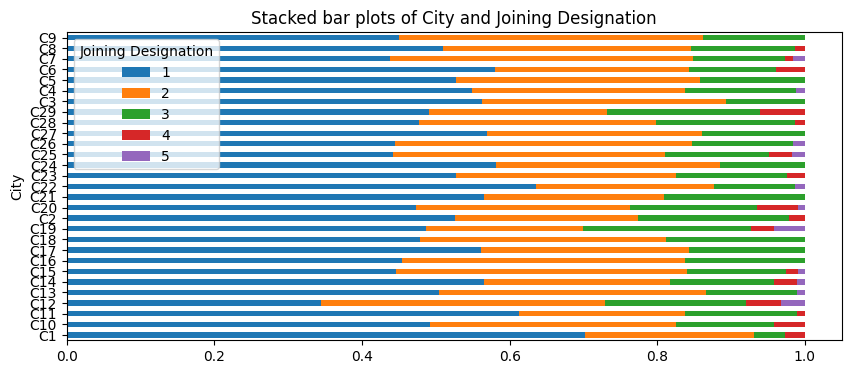

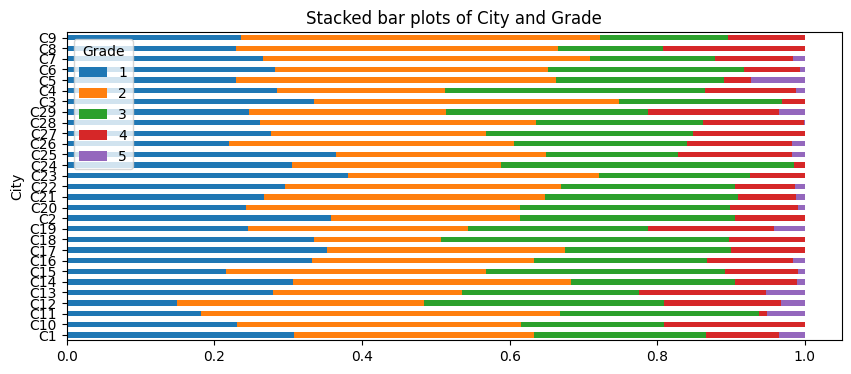

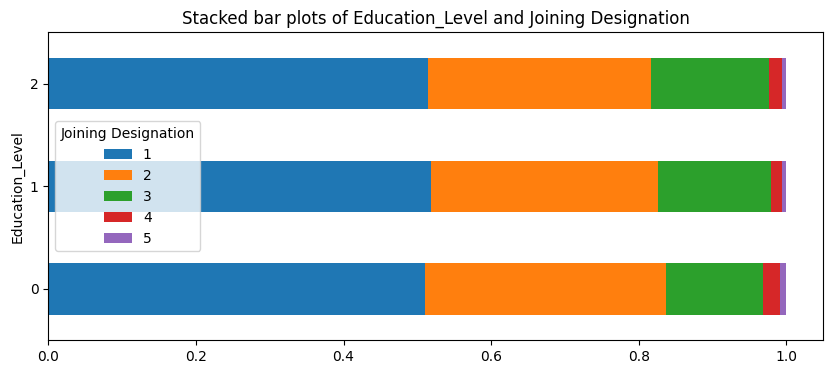

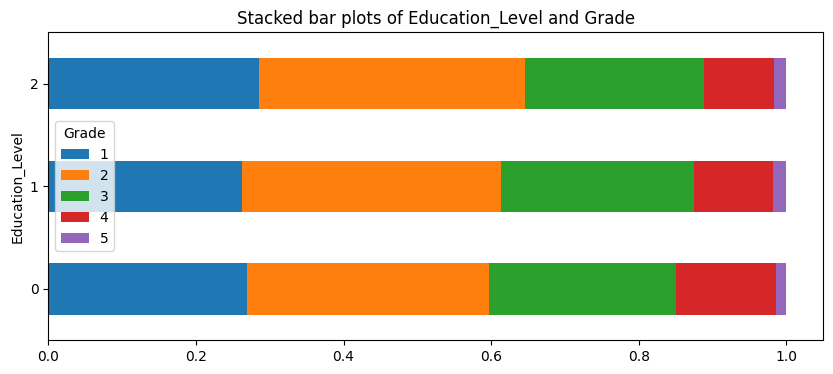

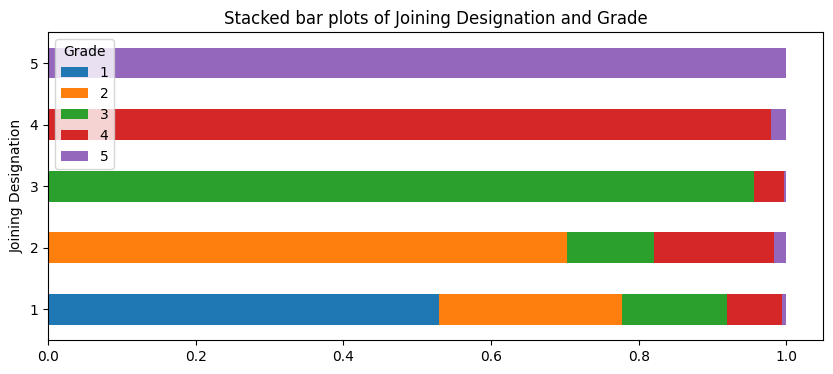

In [17]:
for i in range(len(categorical_cols)):
  for j in range(i+1,len(categorical_cols)):
    cat_cols1 = categorical_cols[i]
    cat_cols2 = categorical_cols[j]

    crosstab = pd.crosstab(data[cat_cols1],data[cat_cols2],normalize = 'index')
    crosstab.plot(kind = 'barh',stacked = True, figsize=(10,4))
    plt.title(f"Stacked bar plots of {cat_cols1} and {cat_cols2}")
    plt.show()

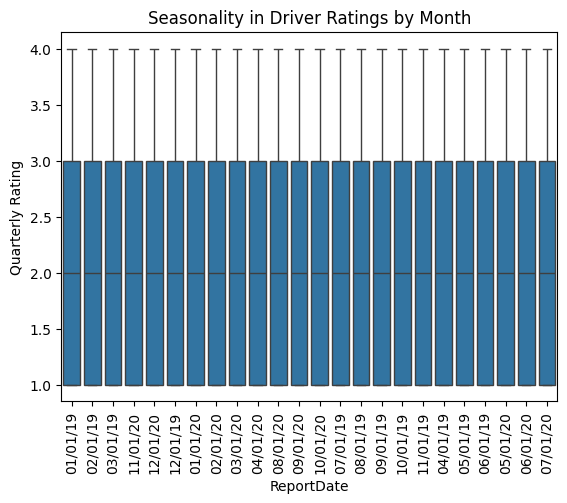

In [18]:
#For Question 10

sns.boxplot(x='ReportDate', y='Quarterly Rating', data=data)
plt.title('Seasonality in Driver Ratings by Month')
plt.xlabel('ReportDate')
plt.ylabel('Quarterly Rating')
plt.xticks(rotation=90)
plt.show()

In [19]:
#For Question 3

improvement = data.groupby('City')['Quarterly Rating'].agg(['mean', 'max'])
improvement

<ipython-input-19-24b0a0dd13f2>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  improvement = data.groupby('City')['Quarterly Rating'].agg(['mean', 'max'])


,mean,max
City,,
C1,1.968981,4
C10,1.915323,4
C11,1.970085,4
C12,2.005502,4
C13,2.033392,4
C14,2.083333,4
C15,1.988173,4
C16,2.097320,4
C17,1.765909,4


In [20]:
#For Question 4

mean_value_grade_a = data[data['Grade'] == 'A']['Total Business Value'].mean()
mean_value_grade_a

nan

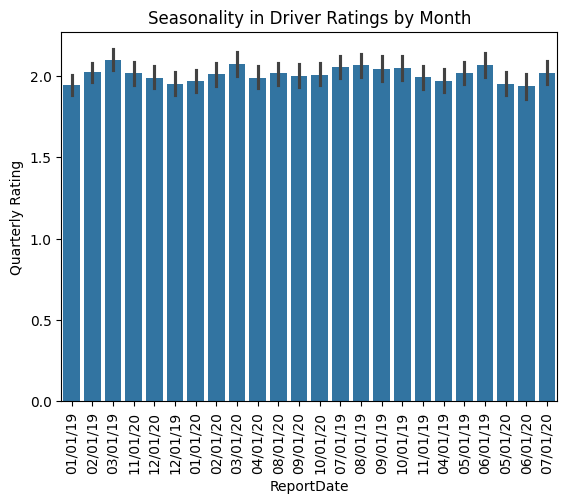

In [21]:
#For Question 10

sns.barplot(x='ReportDate', y='Quarterly Rating', data=data)
plt.title('Seasonality in Driver Ratings by Month')
plt.xlabel('ReportDate')
plt.ylabel('Quarterly Rating')
plt.xticks(rotation=90)
plt.show()

In [22]:
data.duplicated().sum()

np.int64(0)

In [23]:
data.isnull().sum()

,0
ReportDate,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488
Joining Designation,0


In [24]:
data.isnull().sum().sum()

np.int64(35089)

In [25]:
data['Days_Since_Joining'] = (pd.to_datetime('today') - data['Dateofjoining']).dt.days
data['Days_Since_Last_Work'] = (pd.to_datetime('today') - data['LastWorkingDate']).dt.days

In [26]:
data = data.fillna(method='ffill')

<ipython-input-26-449dda89d9c2>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


In [27]:
data.isnull().sum()

,0
ReportDate,0
Driver_ID,0
Age,0
Gender,0
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,2
Joining Designation,0


In [28]:
data.dropna(inplace=True)

In [29]:
data.isnull().sum()

,0
ReportDate,0
Driver_ID,0
Age,0
Gender,0
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,0
Joining Designation,0


In [30]:
def outliers(col):
  Q1= data[col].quantile(0.25)
  Q3=data[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  data[col] = data[col].apply(lambda x: min(max(x, lower_bound),upper_bound))

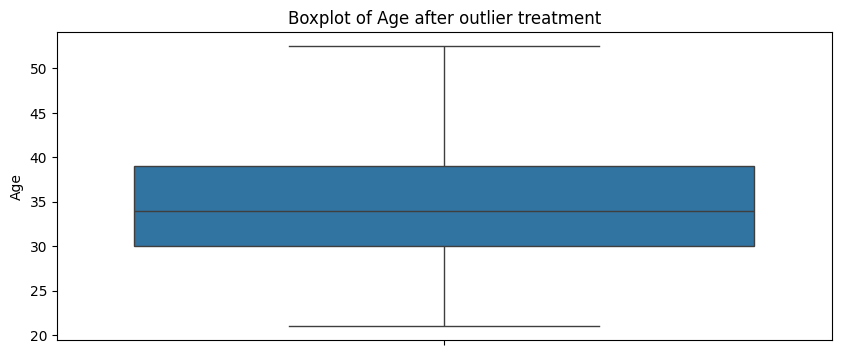

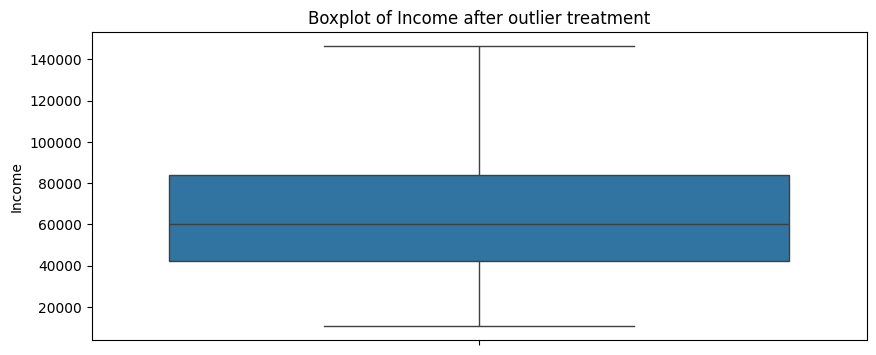

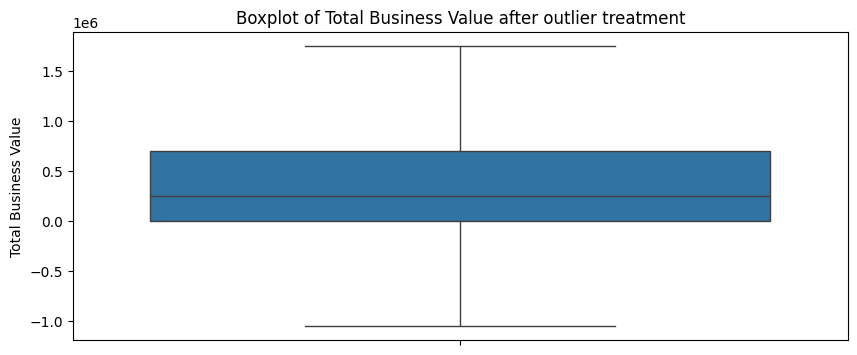

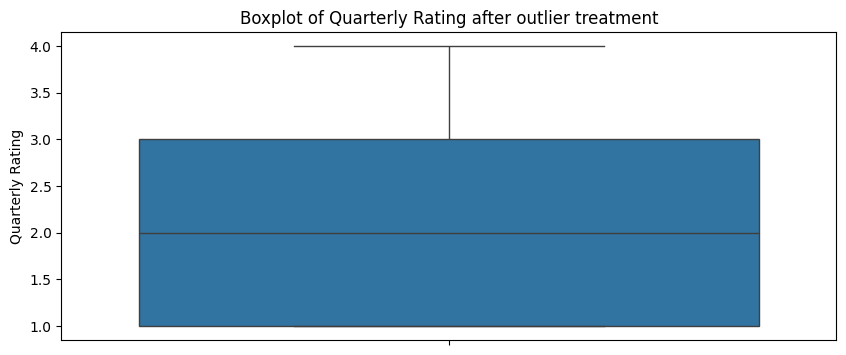

In [31]:
for col in continuous_cols:
  outliers(col)

for col in continuous_cols:
  plt.figure(figsize = (10,4))
  sns.boxplot(data[col])
  plt.title(f"Boxplot of {col} after outlier treatment")
  plt.show()

In [32]:
data['Age_Group'] = pd.cut(data['Age'], bins=[18, 30, 50, 100], labels=['Young', 'Middle-aged', 'Senior'])

In [33]:
data = data.drop(columns=['Dateofjoining', 'LastWorkingDate','ReportDate'])

In [34]:
data = pd.get_dummies(data, columns=['Gender','City', 'Joining Designation','Education_Level', 'Grade','Age_Group'], drop_first=True)

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Income', 'Total Business Value']] = scaler.fit_transform(data[['Income', 'Total Business Value']])

In [36]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Churn'])
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [38]:
X_train_resampled.isnull().sum()

,0
Driver_ID,0
Age,0
Income,0
Total Business Value,0
Quarterly Rating,0
Months Since Last Work,0
Days_Since_Joining,0
Days_Since_Last_Work,0
Gender_1.0,0
City_C10,0


In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [40]:
y_pred = rf.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9328214971209213


In [42]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(random_state=42)

In [45]:
y_pred1 = gb.predict(X_test)

In [46]:
print(accuracy_score(y_pred1, y_test))

0.8670389111847845


In [ ]:
importances = gb.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]}: {importances[indices[f]]}")

Quarterly Rating: 0.5252727276261928
Total Business Value: 0.10767295916514877
Months Since Last Work: 0.08472230989580691
Days_Since_Joining: 0.041587428664155046
Age: 0.03228564544879062
Gender_1.0: 0.025989548702134727
Education_Level_2: 0.024862999823717234
Education_Level_1: 0.02341038673028417
Age_Group_Middle-aged: 0.022363655972242904
Grade_2: 0.021815441883826496
Grade_3: 0.01837781018073939
Income: 0.011740024884155183
Days_Since_Last_Work: 0.010896520401010029
Grade_4: 0.0072514685051487905
City_C2: 0.006136809910304286
Joining Designation_2: 0.0033795880524657043
City_C13: 0.0029552147627635765
City_C20: 0.0024554574528768457
Age_Group_Senior: 0.002278948007068127
City_C12: 0.0021649811595581994
City_C9: 0.0018358147331796262
City_C4: 0.001738459614526449
City_C28: 0.0015401069926951657
City_C17: 0.0015085601688865017
Joining Designation_3: 0.0014742094202736236
City_C3: 0.0013650964860870269
City_C10: 0.001357466308078464
City_C6: 0.0012967823105462376
City_C7: 0.001215199

Actionable Insights and Recommendations:

1. From EDA,

    1. Age distribution of most of the drivers is between 30-40 years.

    2. The income distribution indicates that majority of drivers earn between 25,000 to 75,000.

    3. The education level of most of the drivers is either 12+ or graduate.

    4. Cities of C20 and C29 have the highest concentration of drivers.

2. From analyzing co-efficient:

    1. Quarterly Rating is the most important feature in the model, It has a great impact in predicting the model, followed by 'Total Business Value' which is the second most important feature in the model.

    2. 'Months Since Last Work' has the third most importance in the feature in the model, Followed by 'Days since joining' and 'Age' whic are of less importance comparatively.

3. Features like 'Gender_1','Education_Level' have varying importance in the model.

4. Whereas, Features like 'City_C14, City_C29, Designation_4, and Grade_5 have an importance score of 0, meaning they do not contribute to model.

5. Since, Quarterly rating being the main parameter, assigning the right rating is adequete and also adding incentive per rating can improve the driver retention.

6. Setting up regular review system and feedback mechanisms can give a better idea of performance for every driver.

Questionaire:

What percentage of drivers have received a quarterly rating of 5?

Answer: 0

In [ ]:
percentage = (data['Quarterly Rating'] == 5).mean() * 100
print(percentage)

0.0


Comment on the correlation between Age and Quarterly Rating.

Answer: 0.17

In [ ]:
correlation = data[['Age', 'Quarterly Rating']].corr().iloc[0, 1]
correlation

0.17136833824928735

Name the city which showed the most improvement in Quarterly Rating over
the past year?

Answer: C1

In [ ]:
#From the EDA

print(improvement.head(1))

          mean  max
City               
C1    1.968981    4


Drivers with a Grade of ‘A’ are more likely to have a higher Total Business Value.
(T/F):

Answer: False

In [ ]:
mean_value_grade_a

nan

If a driver's Quarterly Rating drops significantly, how does it impact their Total
Business Value in the subsequent period?

Answer: Drop in Quarterly Rating has an adeverse effect from the EDA below.

In [ ]:
data['Quarterly_Rating_Change'] = data.groupby('Driver_ID')['Quarterly Rating'].diff()

In [ ]:
data['Next_Period_Total_Business_Value'] = data.groupby('Driver_ID')['Total Business Value'].shift(-1)

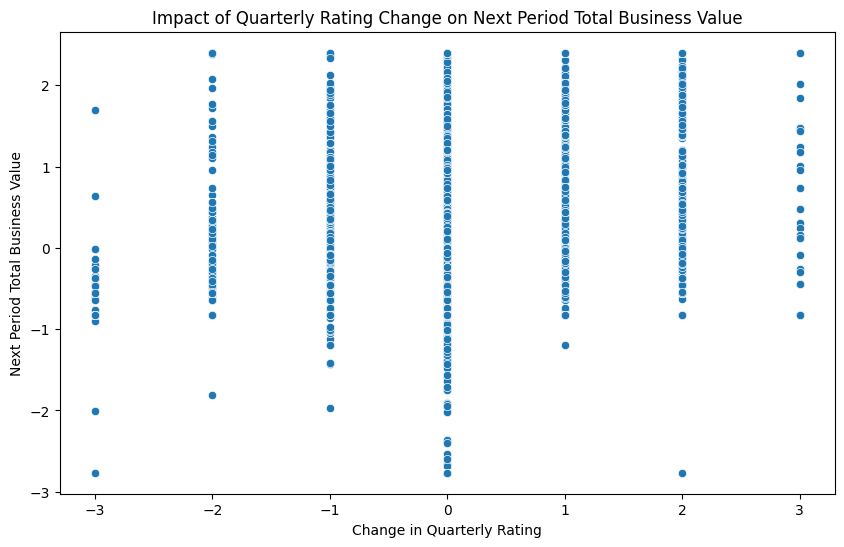

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quarterly_Rating_Change', y='Next_Period_Total_Business_Value', data=data)
plt.title('Impact of Quarterly Rating Change on Next Period Total Business Value')
plt.xlabel('Change in Quarterly Rating')
plt.ylabel('Next Period Total Business Value')
plt.show()

From Ola's perspective, which metric should be the primary focus for driver
retention?
1. ROC AUC
2. Precision
3. Recall
4. F1 Score

Answer: Recall

How does the gap in precision and recall affect Ola's relationship with its
drivers and customers?

Answer: High Recall, Low Precision can lead to unncessary interventions.
Whereas, Low Recall and High Precision leads to missing oppurtunity to retain At-Risk Drivers.

Besides the obvious features like "Number of Rides", which lesser-discussed
features might have a strong impact on a driver's Quarterly Rating?

Answer: Education Level, Joining Designation, Last Working Date, Age.

Will the driver's performance be affected by the City they operate in? (Yes/No)

Answer: Yes

Analyze any seasonality in the driver's ratings. Do certain times of the year
correspond to higher or lower ratings, and why might that be?

No, There is no major variation in driver ratings.
From EDA we can say better ratings is observed during march and july which can considered as summer season.
Least ratings are observed between December and January which can said as winter season.